In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2)
## &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; $y_t = ϵ_t\sqrt{ω+α_1y^2_{t-1}+α_2y^2_{t-2}+β_1σ^2_{t-1}+β_2σ^2_{t-2}}$ 
### &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; $σ_0 = σ_1=1$ 
### &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; $y_0, y_1 \sim N(0,1)$
### &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; &ensp; $ϵ_t \sim N(0,1)$

In [2]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

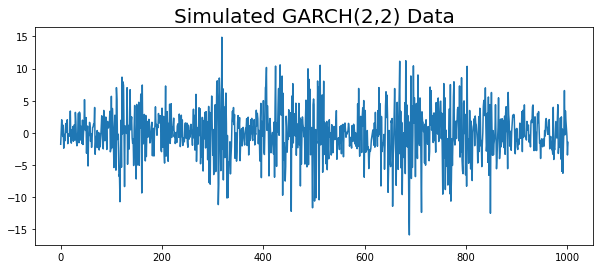

In [3]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

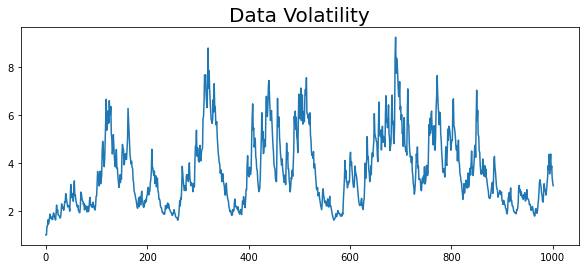

In [4]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

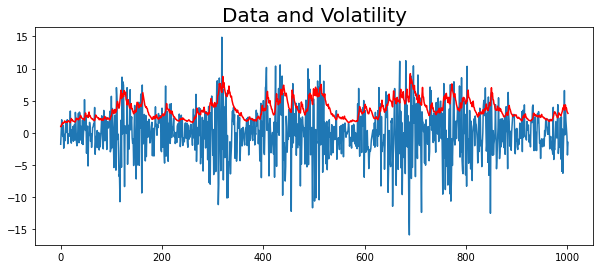

In [5]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot of $y^2_t$

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


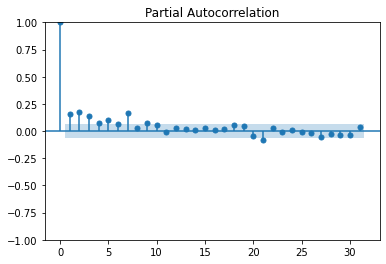

In [6]:
plot_pacf(np.array(series)**2)
plt.show()

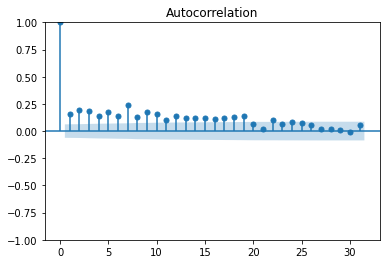

In [7]:
plot_acf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [8]:
train, test = series[:-test_size], series[-test_size:]
model = arch_model(train, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2525.3736288896353
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3537.4424690197775
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2486.9991267720243
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2388.9301699436874
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2380.5957221657677
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2379.609662613406
Iteration:      7,   Func. Count:     61,   Neg. LLF: 2379.5281863538544
Iteration:      8,   Func. Count:     69,   Neg. LLF: 2379.4777899396913
Iteration:      9,   Func. Count:     77,   Neg. LLF: 2379.7486728847953
Iteration:     10,   Func. Count:     85,   Neg. LLF: 2379.455569805733
Iteration:     11,   Func. Count:     92,   Neg. LLF: 2379.4555625967796
Iteration:     12,   Func. Count:     98,   Neg. LLF: 2379.4555625968896
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2379.4555625967796
            Itera

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2379.46
Distribution:                  Normal   AIC:                           4770.91
Method:            Maximum Likelihood   BIC:                           4799.74
                                        No. Observations:                  902
Date:                Mon, Nov 07 2022   Df Residuals:                      901
Time:                        19:59:51   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0150  8.810e-02     -0.170      0.865 [ -0.188,  0.158]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3094      0.132      2.344  1.909e-02 [5.066e-02,  0.568]
alpha[1]       0.0937  4.322e-02      2.168  3.015e-02 [8.997e-03,  0.178]
alpha[2]       0.1520  5.174e-02      2.937  3.311e-03 [5.057e-02,  0.253]
beta[1]        0.4464      0.176      2.542  1.103e-02   [  0.102,  0.791]
beta[2]        0.3052      0.152      2.002  4.523e-02 [6.480e-03,  0.604]
==========================================================================

Covariance estimator: robust
"""

In [9]:
predictions = model_fit.forecast(horizon=test_size)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


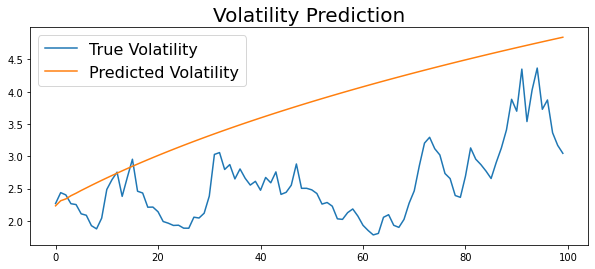

In [10]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [11]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
Fal

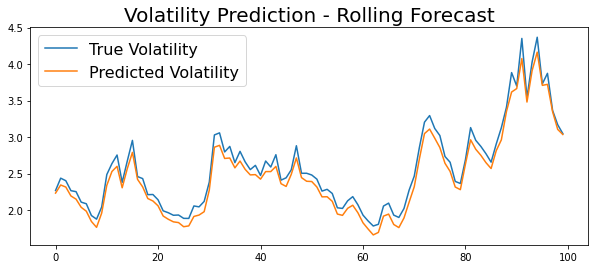

In [12]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)